In [1]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from ml.anomaly_detector import AnomalyConfig, prepare_daily_series, detect_anomalies

DATA_PATH = PROJECT_ROOT / "data" / "processed" / "subte_molinetes_ridership_clean.csv"
df = pd.read_csv(DATA_PATH, low_memory=False)
df.shape


(11440437, 13)

In [2]:
cfg = AnomalyConfig(window=14, z_threshold=3.0)
daily = prepare_daily_series(df, cfg)
daily.head(), daily.shape


(        date         estacion  pax_total
 0 2024-02-01           Acoyte     8161.0
 1 2024-02-01          Alberti     3249.0
 2 2024-02-01   Angel Gallardo     9174.0
 3 2024-02-01  Avenida de Mayo     3510.0
 4 2024-02-01         Callao.B     9302.0,
 (1276, 3))

In [3]:
# For a lighter demo, run global anomalies by dropping station dimension
cfg_global = AnomalyConfig(station_col=None, window=14, z_threshold=3.0)
daily_global = prepare_daily_series(df, cfg_global)

anoms_global = detect_anomalies(daily_global, cfg_global)
anoms_global[anoms_global["is_anomaly"]].tail(10)


,date,pax_total,rolling_mean,rolling_std,z_score,is_anomaly,anomaly_type


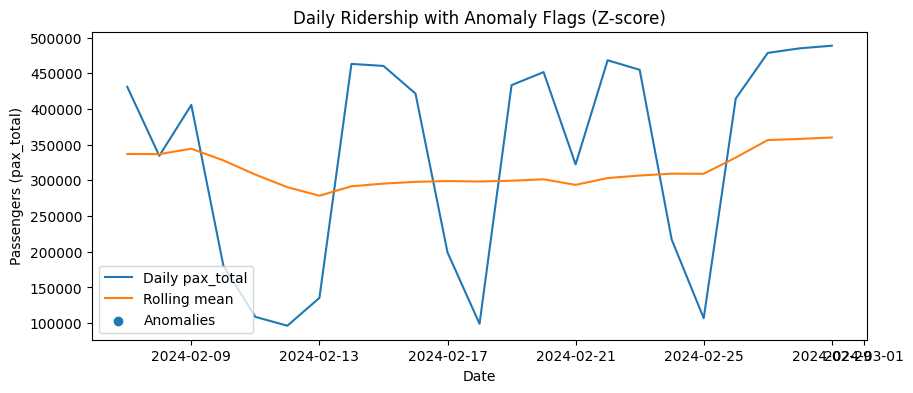

In [5]:
import matplotlib.pyplot as plt

plot_df = anoms_global.dropna(subset=["rolling_mean"]).copy()

plt.figure(figsize=(10, 4))
plt.plot(plot_df["date"], plot_df["pax_total"], label="Daily pax_total")
plt.plot(plot_df["date"], plot_df["rolling_mean"], label="Rolling mean")
plt.scatter(
    plot_df.loc[plot_df["is_anomaly"], "date"],
    plot_df.loc[plot_df["is_anomaly"], "pax_total"],
    label="Anomalies",
)
plt.xlabel("Date")
plt.ylabel("Passengers (pax_total)")
plt.title("Daily Ridership with Anomaly Flags (Z-score)")
plt.legend()
plt.show()
